In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import dual_annealing

# ============================================================
# 1) Generate sample or real data
# ============================================================
df = pd.read_csv(r"C:\work\\Flam_R-D\\xy_data.csv")

x_data = df['x'].values
y_data = df['y'].values

# Ensure sorted order for consistent comparison
sorted_idx = np.argsort(x_data)
x_data = x_data[sorted_idx]
y_data = y_data[sorted_idx]

# Parameter range for t
t_vals = np.linspace(6, 60, len(x_data))

In [14]:
# ============================================================
# 2) Define the curve model
# ============================================================
def curve_model(t, theta_deg, M, X):
    theta_rad = np.deg2rad(theta_deg)
    x_pred = (
        t * np.cos(theta_rad)
        - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta_rad)
        + X
    )
    y_pred = (
        42
        + t * np.sin(theta_rad)
        + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta_rad)
    )
    return x_pred, y_pred


In [15]:

# ============================================================
# 3) Define the L1 objective (mean absolute error)
# ============================================================
def objective(params):
    theta_deg, M, X = params
    x_pred, y_pred = curve_model(t_vals, theta_deg, M, X)
    loss = np.mean(np.abs(x_pred - x_data)) + np.mean(np.abs(y_pred - y_data))
    return loss


In [16]:

# ============================================================
# 4) Define parameter bounds
# ============================================================
bounds = [
    (0, 90),    # theta (deg)
    (0, 0.1),   # M
    (50, 60),   # X
]


In [17]:

# ============================================================
# 5) Run Dual Annealing optimizer
# ============================================================
result = dual_annealing(objective, bounds, maxiter=1000, seed=42)

best_theta, best_M, best_X = result.x
min_loss = result.fun

print(f"Theta (deg): {best_theta:.6f}")
print(f"M: {best_M:.8f}")
print(f"X: {best_X:.6f}")
print(f"Minimum L1 Distance: {min_loss:.6f}")


Theta (deg): 30.043639
M: 0.02999055
X: 55.015524
Minimum L1 Distance: 0.302291


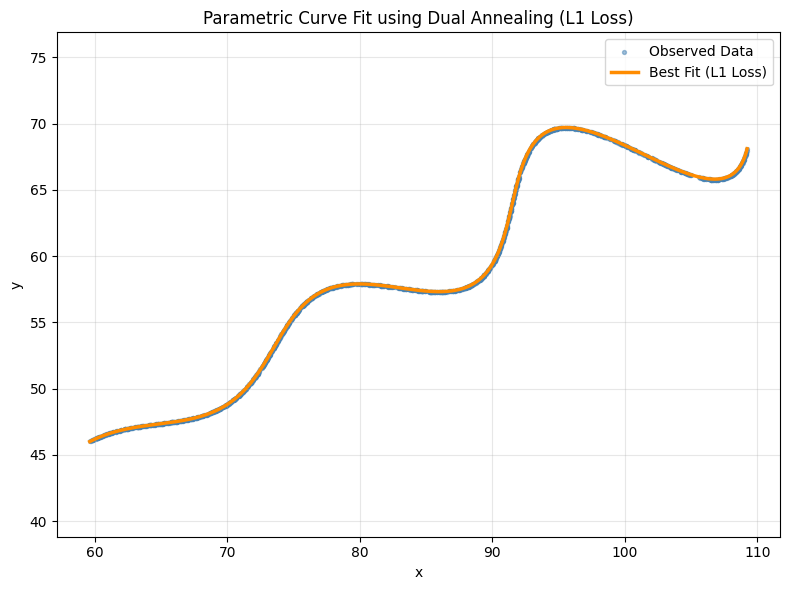

In [19]:

# ============================================================
# 7) Plotting the fitted curve vs observed data
# ============================================================
x_fit, y_fit = curve_model(t_vals, best_theta, best_M, best_X)

plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, s=8, color='steelblue', alpha=0.5, label='Observed Data')
plt.plot(x_fit, y_fit, color='darkorange', lw=2.5, label='Best Fit (L1 Loss)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Parametric Curve Fit using Dual Annealing (L1 Loss)")
plt.legend()
plt.grid(alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [20]:

# ============================================================
# 6) Print LaTeX-like final expression
# ============================================================
eqn_str = (
    f"\\left( t*\\cos({best_theta:.6f}) - e^{{{best_M:.8f}\\left|t\\right|}}\\cdot"
    f"\\sin(0.3t)\\sin({best_theta:.6f}) + {best_X:.6f}, "
    f"42 + t*\\sin({best_theta:.6f}) + e^{{{best_M:.8f}\\left|t\\right|}}\\cdot"
    f"\\sin(0.3t)\\cos({best_theta:.6f}) \\right)"
)
print("\nLaTeX/Desmos-ready expression:\n", eqn_str)


LaTeX/Desmos-ready expression:
 \left( t*\cos(30.043639) - e^{0.02999055\left|t\right|}\cdot\sin(0.3t)\sin(30.043639) + 55.015524, 42 + t*\sin(30.043639) + e^{0.02999055\left|t\right|}\cdot\sin(0.3t)\cos(30.043639) \right)
